In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = pd.read_csv("../../datasets/toxic_comments_2.csv",nrows=4000)

In [3]:
dataset.head(6)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...


In [4]:
labels = pd.read_csv("../../datasets/labels.csv",nrows=4000)

In [5]:
labels = labels[["id","toxic"]]

In [6]:
labels["toxic"] = labels["toxic"].replace(-1,1)

In [7]:
labels["toxic"].value_counts()

1    2522
0    1478
Name: toxic, dtype: int64

In [8]:
corpus = []
dataset["comment_text"] = dataset["comment_text"].str.replace("\n"," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("@"," ")
dataset["comment_text"] = dataset["comment_text"].str.replace("=="," ")
for i in range(0,4000):
    words = re.sub('[^a-zA-Z]',' ',dataset["comment_text"][i])
    words = words.lower().split()
    words = [word for word in words if not word in set(stopwords.words("english"))]
    sentence = ' '.join(words)
    corpus.append(sentence)

In [9]:
len(corpus)

4000

In [10]:
cv = CountVectorizer(max_features=1500)

In [11]:
X = cv.fit_transform(corpus).toarray()
y = labels["toxic"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) #800 test samples

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
len(y_pred[y_pred==0])

274

In [15]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [16]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)

In [17]:
metrics = {"accuracy":accuracy,"precision":precision,"f1_score":f1_score,"recall":recall_score}

In [18]:
for metric in metrics:
    print(metric.title() + " is ",metrics[metric])

Accuracy is  0.56875
Precision is  0.6368821292775665
F1_Score is  0.6600985221674875
Recall is  0.6850715746421268


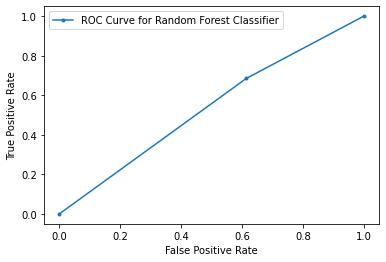

In [19]:
from sklearn.metrics import roc_curve
fp,tp,treshold = roc_curve(y_test,y_pred)
plt.plot(fp,tp,marker = '.',label='ROC Curve for Random Forest Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()